## Trainin and testing the RPS model by building the DL model from scratch and building the DL model using Transfer learning.

Downloaded this dataset from http://www.laurencemoroney.com/rock-paper-scissors-dataset/

In [188]:
import tensorflow as tf
from tensorflow import keras
import shutil
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
import PIL.Image
import matplotlib.pyplot as plt
import cv2

In [189]:
pre_mod = keras.applications.Xception()

In [190]:
training_dir = "D:/data_sets/rps/"

In [191]:
testing_dir = "D:/data_sets/rps-test-set/"

## Building model from the scratch

In [192]:
model = keras.Sequential([
    keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (300, 300, 3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation = 'relu'),
    keras.layers.Dense(3, activation = tf.nn.softmax)
])

In [193]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 78400)            

In [194]:
train_datagen  = ImageDataGenerator(rescale = 1/255, rotation_range = 40, 
                                    shear_range = 0.2, zoom_range = 0.2, 
                                    horizontal_flip = True, width_shift_range = 0.2, 
                                    height_shift_range = 0.2)

In [195]:
test_datagen = ImageDataGenerator(rescale = 1/255)

In [196]:
train = train_datagen.flow_from_directory(training_dir, batch_size = 100, class_mode = 'categorical', interpolation = 'nearest', target_size = (300, 300))

Found 2517 images belonging to 3 classes.


In [197]:
test = test_datagen.flow_from_directory(testing_dir, batch_size = 100, class_mode = 'categorical', interpolation = 'nearest', target_size = (300, 300))

Found 372 images belonging to 3 classes.


In [198]:
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [208]:
hist = model.fit(train, epochs = 20, verbose = 1, validation_data = test, steps_per_epoch = 8)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 8 steps, validate for 4 steps
Epoch 1/20
8/8 [==============================] - 67s 8s/step - loss: 0.3740 - accuracy: 0.8577 - val_loss: 0.4075 - val_accuracy: 0.7769
Epoch 2/20
8/8 [==============================] - 76s 10s/step - loss: 0.3957 - accuracy: 0.8500 - val_loss: 0.4373 - val_accuracy: 0.8011
Epoch 3/20
8/8 [==============================] - 76s 9s/step - loss: 0.3562 - accuracy: 0.8550 - val_loss: 0.3689 - val_accuracy: 0.7957
Epoch 4/20
8/8 [==============================] - 76s 9s/step - loss: 0.3699 - accuracy: 0.8600 - val_loss: 0.2858 - val_accuracy: 0.8522
Epoch 5/20
8/8 [==============================] - 77s 10s/step - loss: 0.4075 - accuracy: 0.8537 - val_loss: 0.1986 - val_accuracy: 0.9651
Epoch 6/20
8/8 [==============================] - 77s 10s/step - loss: 0.4144 - accuracy: 0.8400 - val_loss: 0.3360 - val_accuracy: 0.8226
Epoch 7/20
8/8 [==============================] - 76s 10s/step - loss: 0.3708 -

In [209]:
testing_dir = "D:/data_sets/rps_sample/"

In [210]:
test_img = os.listdir(testimg_dir)

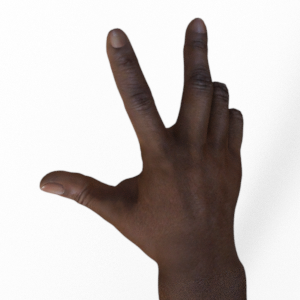

In [212]:
rgba_image = PIL.Image.open("D:/data_sets/rps_sample/scissors04-052.png")
rgb_im = rgba_image.convert('RGB')
rgb_im

In [213]:
rgba_image = PIL.Image.open(os.path.join(testing_dir, test_img[2]))
rgb_im = rgba_image.convert('RGB')
rgb_im
imq = np.expand_dims(rgb_im, axis = 0)
imq.shape

(1, 300, 300, 3)

### The probability values in model.predict are based on the Alphabetical order that is 
1. 1st value indicates paper
2. 2nd value indicates rock
3. 3rd value indicates scissors

In [214]:
model.predict(imq) 

array([[0., 0., 1.]], dtype=float32)

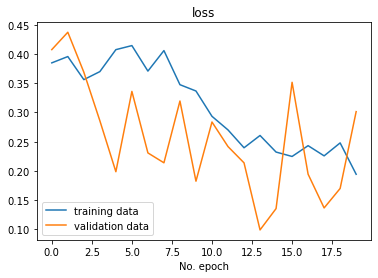

In [219]:
plt.plot(hist.history['loss'], label='training data')
plt.plot(hist.history['val_loss'], label='validation data')
plt.title("loss")
plt.xlabel('No. epoch')
plt.legend(loc="lower left")
plt.show()

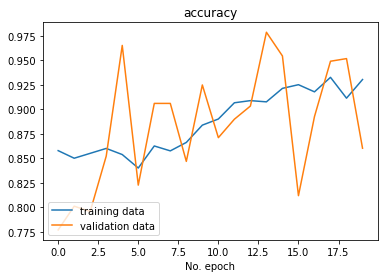

In [221]:
plt.plot(hist.history['accuracy'], label='training data')
plt.plot(hist.history['val_accuracy'], label='validation data')
plt.title("accuracy")
plt.xlabel('No. epoch')
plt.legend(loc="lower left")
plt.show()